In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = pd.read_csv(os.path.join("data", "train.csv"), header=0).set_index("PassengerId")
test_data = pd.read_csv(os.path.join("data", "test.csv"), header=0).set_index("PassengerId")

In [3]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

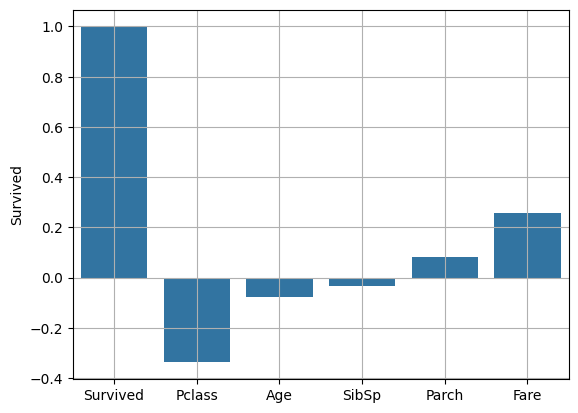

In [4]:
sns.barplot(train_data.corr(numeric_only=True)["Survived"])
plt.grid()

#### Survived, Pclass Age SibSp, Parch, Fareは数字データ
#### Name, Sex, Ticket, Cabin, Embarkedはほかのデータ型

In [5]:
train_data["Sex"]

PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: Sex, Length: 891, dtype: object

### Sex列はone-hot vector化した

In [6]:
train_data = pd.get_dummies(train_data, columns=["Sex"])
test_data = pd.get_dummies(test_data, columns=["Sex"])
train_data

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,False,True
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,True,False
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,True,False


In [7]:
train_data.isna().sum()

Survived        0
Pclass          0
Name            0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Sex_female      0
Sex_male        0
dtype: int64

In [8]:
train_data["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

# CabinはU(unknown)でfillnaしました

<Axes: xlabel='Cabin', ylabel='Survived'>

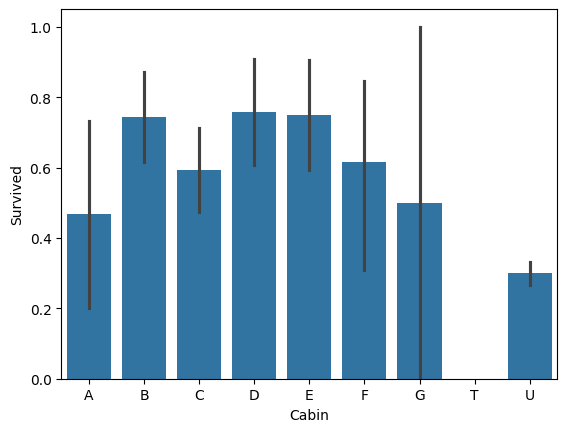

In [9]:
train_data["Cabin"] = train_data["Cabin"].str.get(0)
train_data["Cabin"] = train_data["Cabin"].fillna("U")
sns.barplot(train_data.sort_values("Cabin"), x="Cabin", y="Survived")

### Cabinもone-hot vector化した

In [10]:
train_data = pd.get_dummies(train_data, columns=["Cabin"])
train_data

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True,False,False,False,False,False,False,False,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False,False,False,True,False,False,False,False,False,False
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False,False,False,False,False,False,False,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False,False,False,True,False,False,False,False,False,False
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,False,True,False,False,False,False,False,False,False,False,True
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,True,False,False,True,False,False,False,False,False,False,False
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,S,True,False,False,False,False,False,False,False,False,False,True


## Age自体をfillnaするためのモデルを作りたい

<Axes: xlabel='Age', ylabel='Survived'>

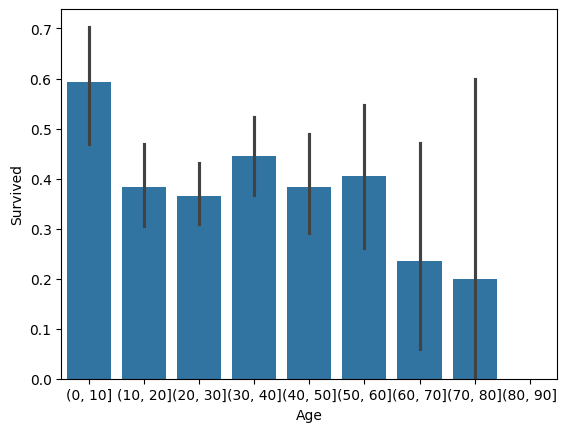

In [11]:
sns.barplot(x=pd.cut(train_data["Age"], bins=np.arange(0, 100, 10)), y=train_data["Survived"])

### EmbarkedもPclassもone-hot vector化した

In [12]:
train_data = pd.get_dummies(train_data, columns=["Embarked", "Pclass"])

In [13]:
train_data

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Cabin_A,...,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,...,False,False,False,True,False,False,True,False,False,True
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,False,...,False,False,False,False,True,False,False,True,False,False
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,...,False,False,False,True,False,False,True,False,False,True
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,...,False,False,False,False,False,False,True,True,False,False
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,False,True,False,...,False,False,False,True,False,False,True,False,True,False
888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,False,False,...,False,False,False,False,False,False,True,True,False,False
889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,True,False,False,...,False,False,False,True,False,False,True,False,False,True


# NameをMrやMrsで位を分けるようにする、SibSp, Parch, FareがどのようにSurvivedに関連付くかを調べる

## とりあえずLogisticRegression()で推論を行ってみる。その後にRandomForestを使ってみる、その際にはone-hot vectorをしないようにする